In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
EC=pd.read_csv('/content/drive/MyDrive/MScProject/online_shoppers_intention.csv')
EC.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
EC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
numerical_variables = EC[[ 'Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay']]

In [ ]:
numerical_variables.describe()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,80.818611,34.472398,1194.746220,0.022191,0.043073,5.889258,0.061427
std,176.779107,140.749294,1913.669288,0.048488,0.048597,18.568437,0.198917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,184.137500,0.000000,0.014286,0.000000,0.000000
50%,7.500000,0.000000,598.936905,0.003112,0.025156,0.000000,0.000000
75%,93.256250,0.000000,1464.157214,0.016813,0.050000,0.000000,0.000000
max,3398.750000,2549.375000,63973.522230,0.200000,0.200000,361.763742,1.000000


In [ ]:
categorical_variables = EC[['Month', 'OperatingSystems', 'Browser','Region','TrafficType','VisitorType','Weekend','Revenue']]

In [ ]:
categorical_variables.nunique()

Month               10
OperatingSystems     8
Browser             13
Region               9
TrafficType         20
VisitorType          3
Weekend              2
Revenue              2
dtype: int64

In [ ]:
variable=['Weekend','Revenue']
for col in variable:
    encoder = LabelEncoder()
    encoder.fit(EC[col])
    print('Column:', col)
    print('Original categories:', encoder.classes_)
    print('Encoded values:', encoder.transform(encoder.classes_))
    print('\n')
    EC[col] = encoder.fit_transform(EC[col])

Column: Weekend
Original categories: [False  True]
Encoded values: [0 1]


Column: Revenue
Original categories: [False  True]
Encoded values: [0 1]




In [ ]:
EC['Month'] = EC['Month'].map({'Feb': 2, 'Mar': 3, 'May': 5,'June':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12})

In [ ]:
EC.duplicated().value_counts()

False    12205
True       125
Name: count, dtype: int64

In [ ]:
EC.drop_duplicates(inplace=True)

In [ ]:
MMC = ['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
EC[MMC] = scaler.fit_transform(EC[MMC])

In [ ]:
fig = px.histogram(EC, x='Revenue', color='Revenue', title='Revenue Class Distribution',
                   labels={'Revenue': 'Revenue', 'count': 'Count'}, color_discrete_map={'0': 'navy', '1': 'orange'})

fig.update_layout(
    xaxis_title='Revenue',
    yaxis_title='Count',
    showlegend=True,
    height=500,
    width=500,
    bargap=0.1,
)
fig.show()

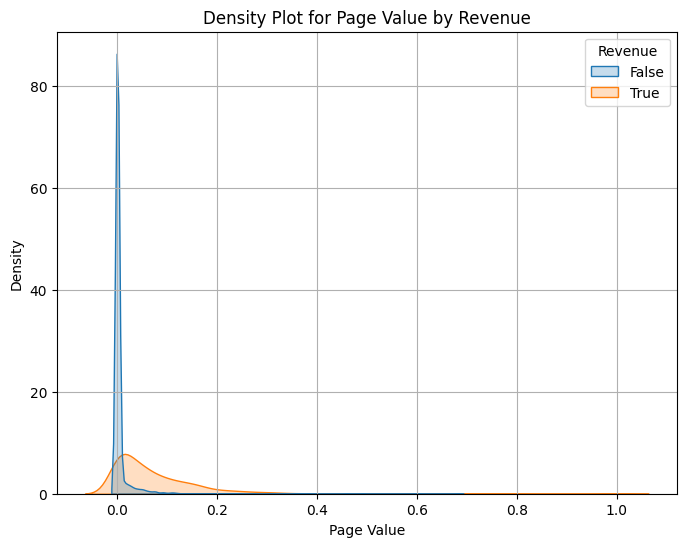

In [ ]:
#fig = px.histogram(EC, x='PageValues', color='Revenue', histnorm='probability density', marginal='violin')

plt.figure(figsize=(8, 6))
sns.kdeplot(data=EC, x='PageValues', hue='Revenue', fill=True, common_norm=False)
plt.title('Density Plot for Page Value by Revenue')
plt.xlabel('Page Value')
plt.ylabel('Density')

plt.grid(True)
plt.show()

In [ ]:
correlation_matrix = EC.corr()

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: 'Returning_Visitor'

In [ ]:
"revenue_comparison = EC.groupby('TrafficType')['Revenue'].agg(['sum']).reset_index()

fig = px.line(revenue_comparison, x='TrafficType', y='sum', markers=True, line_shape='linear',
              labels={'TrafficType': 'Traffic Type', 'sum': 'Total Revenue'})

fig.update_layout(
    title='Total Revenue by Traffic Type',
    xaxis_title='Traffic Type',
    yaxis_title='Total Revenue',
    xaxis=dict(tickangle=45),
    height=500
)

fig.show()



In [ ]:
traffic_types = [1, 2,3,5,8]
visitor = ['VisitorType']

fig = sp.make_subplots(rows=1, cols=len(traffic_types), subplot_titles=[f'Traffic Type {t}' for t in traffic_types])

bar_color = 'teal'

for i, traffic_type in enumerate(traffic_types, start=1):
    traffic_type_data = EC[EC['TrafficType'] == traffic_type]

    for j, variable in enumerate(visitor, start=1):
        fig.add_trace(go.Bar(x=traffic_type_data[variable].value_counts().index,
                             y=traffic_type_data[variable].value_counts().values,
                             name=f'{variable} for Traffic Type {traffic_type}',
                             marker_color=bar_color),row=1, col=i)

fig.update_layout(title_text='Visitors Distribution for Traffic Types',
                  xaxis=dict(title='Visitors type'),
                  yaxis=dict(title='Count'),
                  showlegend=False)

fig.show()


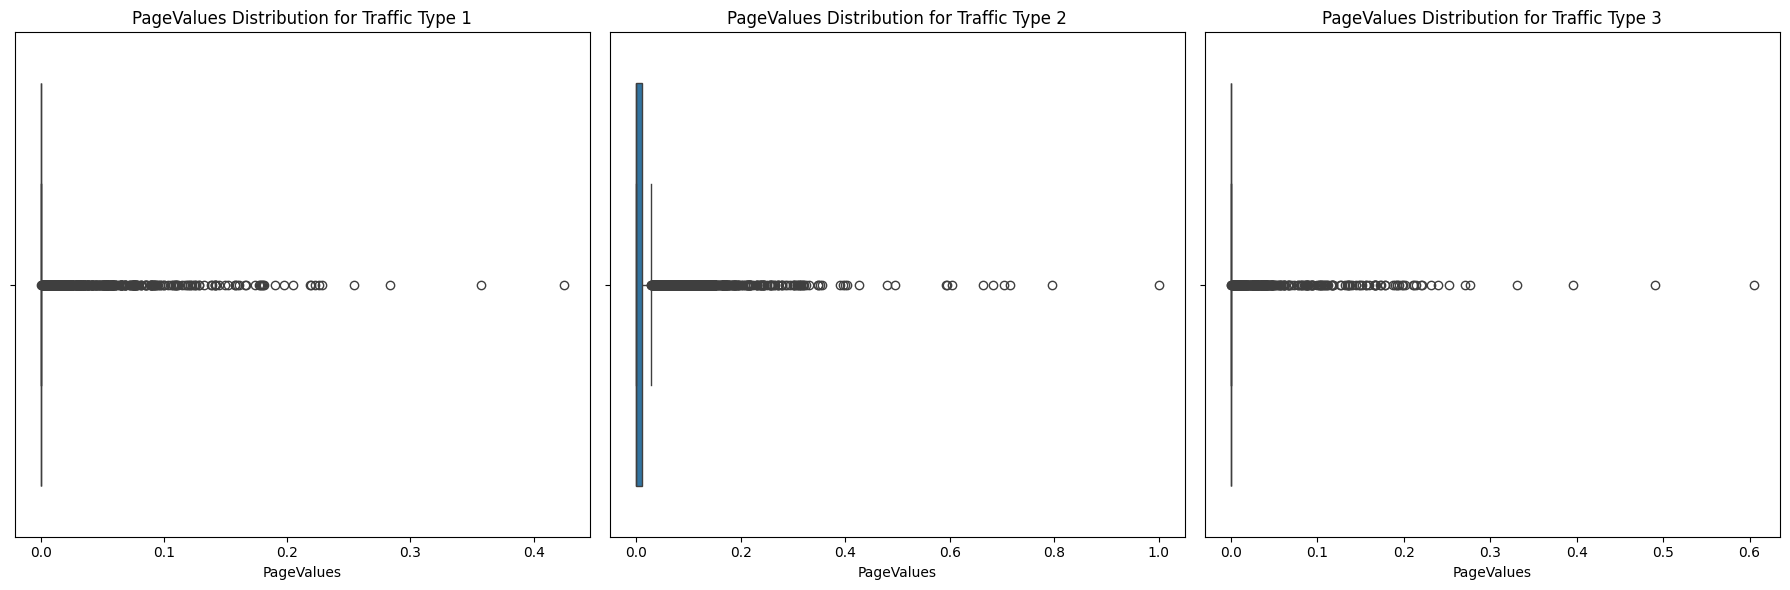

In [ ]:
traffic_types = [1,2, 3]

behavioral_variable = 'PageValues'

plt.figure(figsize=(18, 6))

for i, traffic_type in enumerate(traffic_types, start=1):
    traffic_type_data = EC[EC['TrafficType'] == traffic_type]
    plt.subplot(1, len(traffic_types), i)
    sns.boxplot(data=traffic_type_data, x=behavioral_variable)
    plt.title(f'{behavioral_variable} Distribution for Traffic Type {traffic_type}')
    plt.xlabel(behavioral_variable)

plt.tight_layout()
plt.show()

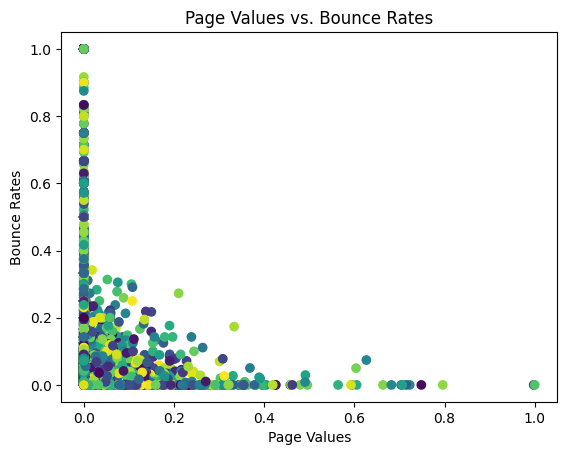

In [ ]:
N=len(EC)
colors = np.random.rand(N)
plt.scatter(EC['PageValues'], EC['BounceRates'],c=colors)
plt.title('Page Values vs. Bounce Rates')
plt.xlabel('Page Values')
plt.ylabel('Bounce Rates')
plt.show()

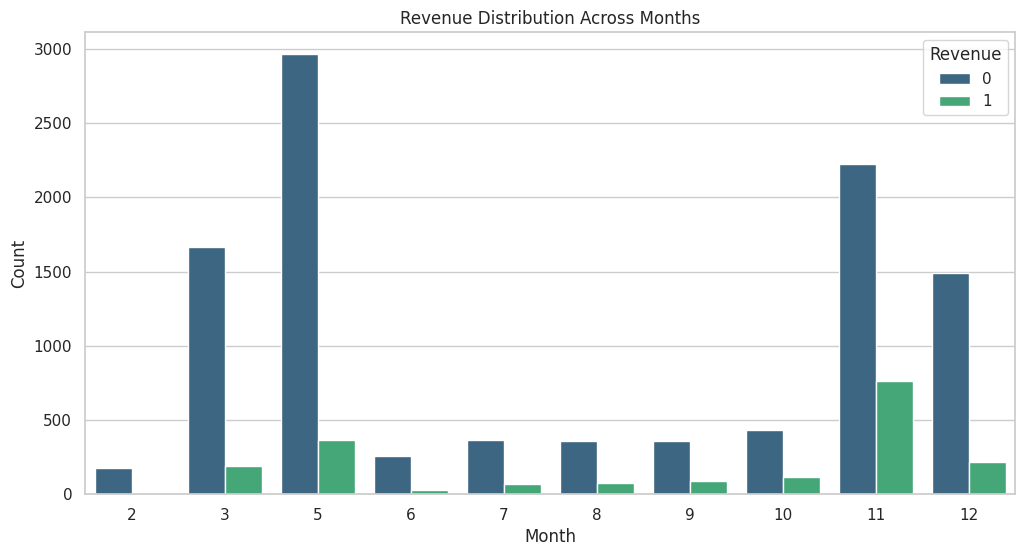

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.countplot(x='Month', hue='Revenue', data=EC, palette='viridis')

plt.title('Revenue Distribution Across Months')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()


<ipython-input-23-bd60cfa1ecdf>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




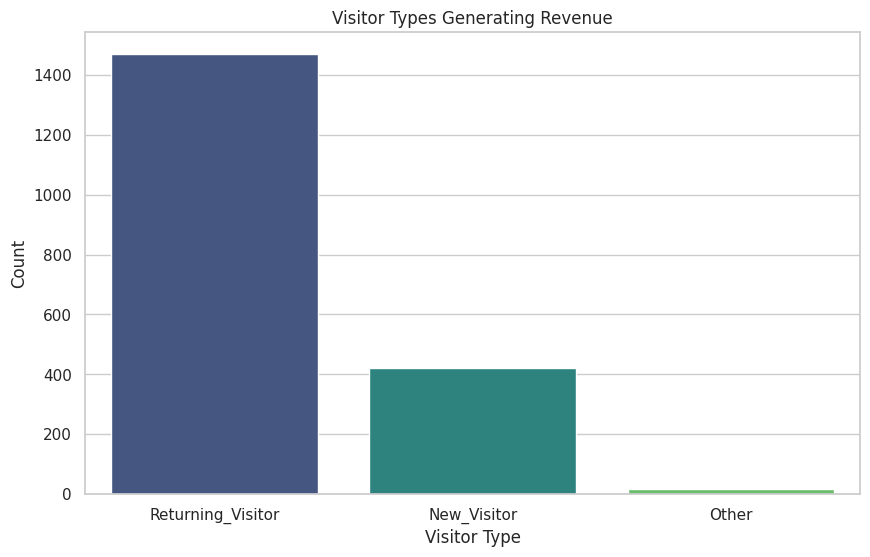

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'EC' is your DataFrame with 'VisitorType' and 'revenue' columns

# Filter the DataFrame for instances where revenue is positive
revenue_generated_data = EC[EC['Revenue'] == 1]

# Set the style for the plot
sns.set(style="whitegrid")

# Create a count plot for revenue distribution across visitor types for revenue-generated instances
plt.figure(figsize=(10, 6))
sns.countplot(x='VisitorType', data=revenue_generated_data, palette='viridis')

# Set labels and title
plt.title('Visitor Types Generating Revenue')
plt.xlabel('Visitor Type')
plt.ylabel('Count')

# Show the plot
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score



In [ ]:

pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.4 MB/s eta 0:00:00


In [ ]:
EC.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,1.00,1.00,0.0,0.0,2,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,0.001000,0.00,0.50,0.0,0.0,2,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,1.00,1.00,0.0,0.0,2,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,0.000042,0.25,0.70,0.0,0.0,2,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,0.009809,0.10,0.25,0.0,0.0,2,3,3,1,4,Returning_Visitor,1,0


In [ ]:


# Initialize the LabelEncoder
label_encoder = LabelEncoder()
#encoder.fit(df['category'])
# Fit and transform the categorical variable
EC['VisitorType'] = label_encoder.fit_transform(EC['VisitorType'])

EC.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,1.00,1.00,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,0.001000,0.00,0.50,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,1.00,1.00,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,0.000042,0.25,0.70,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,0.009809,0.10,0.25,0.0,0.0,2,3,3,1,4,2,1,0


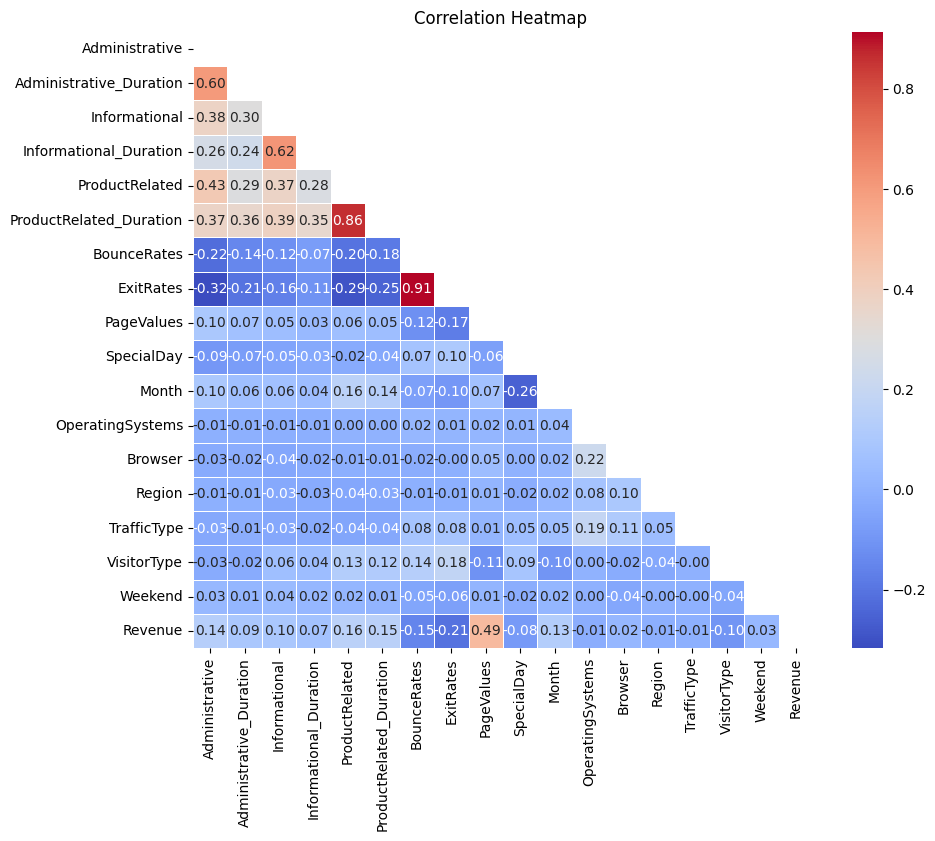

In [ ]:
correlation_matrix = EC.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a correlation heatmap with masked upper triangle
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap ')
plt.show()